<a href="https://colab.research.google.com/github/gebakkenAardappel/WINC/blob/main/income_unequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt

In [ ]:
%load_ext google.colab.data_table

In [ ]:
Gini=pd.read_csv("https://raw.githubusercontent.com/gebakkenAardappel/WINC/main/economic-inequality-gini-index.csv")
GDP=pd.read_csv("https://raw.githubusercontent.com/gebakkenAardappel/WINC/main/gdp-per-capita-maddison-2020.csv")

In [76]:
# NaN in landcode verwijderen: dit zijn alleen extra onderverdelingen in rural of urban
dfG=Gini.dropna(subset=['Code'])  
# grote gebieden/continenten verwijderen Central African Republic. Ivm het combineren met de GDP waarde zijn alleen data tot 2018 interessant. 
dfG=dfG.loc[(dfG.Entity != "United States") & (dfG.Entity != "South Africa") &  (dfG.Entity!="Eastern-Europe") & (dfG.Entity!="Central African Republic") & (dfG.Year<=2018)]
dfG.head(2) 

,Entity,Code,Year,Gini coefficient
0,Albania,ALB,1996,0.270103
1,Albania,ALB,2002,0.317390


In [ ]:
# verwijder kolom "417485-annotations"
Income=GDP.drop(columns=["417485-annotations"])   

#grote gebieden/continenten verwijderen. Alleen de landen overhouden. Ivm het combineren met de gini-data zijn alleen jaartallen vanaf 1974 interessant
dfI=Income.loc[(Income.Entity != "Western Offshoots") & (Income.Entity != "Western-Europe") &  (Income.Entity!="Eastern-Europe") & (Income["Entity"] != "World") &
               (Income.Entity!="Middle-East") & (Income.Entity!="USSR")&  (Income.Entity!="South and South-East Asia") &(Income.Entity!="Latin America") &(Income.Entity!="SubSahara Africa") 
               & (Income.Year>=1967)]
dfI.head(2)    

,Entity,Code,Year,GDP per capita
17,Afghanistan,AFG,1967,1277.0
18,Afghanistan,AFG,1968,1290.0


In [77]:
# kolommen met GDP en Gini data samenvoegen per land per jaar
all=pd.merge(dfI,dfG, on=["Year","Entity"])
dfAll= all.drop(columns=["Code_x", "Code_y"])
dfAll.head(2)

,Entity,Year,GDP per capita,Gini coefficient
0,Albania,1996,3965.6853,0.270103
1,Albania,2002,5608.9624,0.317390


In [ ]:
# correlatie bepalen
corr=dfAll[["GDP per capita","Gini coefficient"]]
corr.corr()

,GDP per capita,Gini coefficient
GDP per capita,1.000000,-0.456659
Gini coefficient,-0.456659,1.000000


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: title={'center': 'relation between GDP and Gini coefficient in various countries worldwide \n over the years 1967 to 2018'}, xlabel='GDP per capita', ylabel='Gini coefficient'>

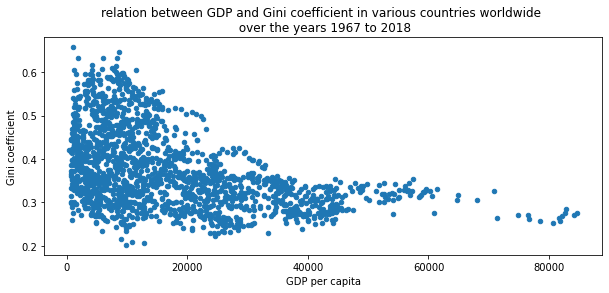

In [78]:
# in grafiek

dfAll.plot(kind='scatter', x="GDP per capita", y="Gini coefficient",figsize=(10,4), 
           title= "relation between GDP and Gini coefficient in various countries worldwide \n over the years 1967 to 2018")


# Conclusie:

*   Over de jaren 1976 tot 2018 is er wereldwijd een relatief sterke negatieve correlatie tussen de Gini coëfficient en het bruto nationaal product.
Aangezien een gini-coëfficiënt van 0 correspondeert met volkomen inkomensgelijkheid en 1 correspondeert met volkomen ongelijkheid, betekent dit dat een hoger bruto nationaal product gepaard gaat met meer inkomens-gelijkheid.
*   Om te voorkomen dat goede jaren de minder goede jaren zouden uitmiddelen is er voor gekozen om per jaar per land te kijken en niet per land over één periode van meerdere jaren.
